# header

In [1]:
'''
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

setInterval(ConnectButton,60000);
'''

from google.colab import drive
from os import chdir

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/Gproject/MIT_glyco'
chdir(project_path)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os
from os.path import exists
print(os.getcwd()) # current working directory

update = False

/content/drive/MyDrive/Gproject/MIT_glyco


In [3]:
load_name = "./data/data_for_ml.csv"
protein_list = list(pd.read_csv(load_name).protein.unique())
protein_augmented = [name for name in protein_list if exists(f'./data/data_for_ml(augmented)/{name}.csv')]

dataset = []
for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    dataset.append(pd.read_csv(load_path))
dataset = pd.concat(dataset, axis=0).reset_index(drop=True)
dataset = dataset[(dataset['SEQ']=='S') | (dataset['SEQ']=='T')].reset_index(drop=True)

positive = dataset[dataset['positivity']==1]
negative = dataset[dataset['positivity']==0]

print("total number of proteins:          ", len(protein_list))
print("total number of augmented proteins:", len(protein_augmented))
print("total number of positive sites:    ", len(positive))

total number of proteins:           272
total number of augmented proteins: 89
total number of positive sites:     185


## parameter settings

In [4]:
from src.Data import *
from src.Preprocessing import *
from src.models import *

variables = xy_variables()
test_size = 0.2
valid_size = test_size/(1-test_size)

import random
random_state = 1
n_cv = 20

hpo_counts = 30
hpo_config = {
    "n_layers" : range(1,11),
    "n_neurons" : [16, 32, 64, 128, 256]
}
metrics = ['n_layers', 'n_neurons', 'epoch', 'time', 'loss', 'val_loss', 'test_loss', 'accuracy', 'precision', 'recall', 'f1']
method = "random"

# model

In [5]:
model_name = 'augmented_mlp_window_important_cts'
x_important = pd.read_csv('./data/features-important-names.csv').column_name.to_list()
x_important

x_cts   = variables.x_cts_window + [
    'all_atom_positive_charge_all_around_target_ser_thr',
    'all_atom_positive_charge_all_backbone_around_target_ser_thr',
    'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
    'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
    'all_atom_positive_charge_all_with_around_target_ser_thr',
    'all_sasa_cys',
    'all_sasa_leu',
    'all_sasa_lys',
    'all_sasa_met',
    'all_sasa_phe',
    'exposed_charge_all_sidechain_with_around_target_ser_thr',
    'exposed_charge_all_with_around_target_ser_thr',
    'exposed_positive_charge_all_with_around_target_ser_thr',
    'net_charge_all_backbone_around_target_ser_thr',
    'net_charge_all_backbone_with_around_target_ser_thr',
    'net_charge_all_sidechain_around_target_ser_thr',
    'net_charge_all_sidechain_with_around_target_ser_thr',
    'net_charge_all_with_around_target_ser_thr',
    'net_charge_all_around_target_ser_thr',
    'sasa_ala',
    'sasa_back',
    'sasa_cys',
    'sasa_e',
    'sasa_g',
    'sasa_ile',
    'sasa_lys',
    'sasa_negative',
    'sasa_polar',
    'sasa_s',
    'sasa_ser',
    'sasa_all_with_around_target_ser_thr'
]
x_cat   = variables.x_cat_window + [
    'number_of_arg',
    'number_of_g',
    'number_of_ser',
    'number_of_thr',
    'number_of_v',
    'number_of_aromatic',
    'number_of_e',
    'number_of_f',
    'number_of_hydrophilic',
    'number_of_hydrophobic',
    'number_of_l',
    'number_of_leu',
    'number_of_lys',
    'number_of_n',
    'number_of_p',
    'number_of_polar',
    'number_of_s',
    'residue_SER_THR'
]
y_label = variables.y_label

print(f"{len(x_cts)} x_cts:")
print(f"{len(x_cat)} x_cat: {x_cat}")
print(f"{len(y_label)} y_label: {y_label}")

data_x, data_y = df_to_dummy(dataset, x_cts, x_cat, y_label)
display(dict(zip(range(len(data_x.columns)), data_x.columns)))

33 x_cts:
30 x_cat: ['SEQ', 'nS/nT', 'nAli', 'nPos', 'phi_psi', 'SS', 'side_-1', 'side_1', 'side_2', 'side_3', 'side_4', 'side_5', 'number_of_arg', 'number_of_g', 'number_of_ser', 'number_of_thr', 'number_of_v', 'number_of_aromatic', 'number_of_e', 'number_of_f', 'number_of_hydrophilic', 'number_of_hydrophobic', 'number_of_l', 'number_of_leu', 'number_of_lys', 'number_of_n', 'number_of_p', 'number_of_polar', 'number_of_s', 'residue_SER_THR']
1 y_label: ['positivity']
dummy x shape: (8910, 521)
dummy y shape: (8910, 1)


{0: 'Proline',
 1: 'flexibility',
 2: 'all_atom_positive_charge_all_around_target_ser_thr',
 3: 'all_atom_positive_charge_all_backbone_around_target_ser_thr',
 4: 'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
 5: 'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
 6: 'all_atom_positive_charge_all_with_around_target_ser_thr',
 7: 'all_sasa_cys',
 8: 'all_sasa_leu',
 9: 'all_sasa_lys',
 10: 'all_sasa_met',
 11: 'all_sasa_phe',
 12: 'exposed_charge_all_sidechain_with_around_target_ser_thr',
 13: 'exposed_charge_all_with_around_target_ser_thr',
 14: 'exposed_positive_charge_all_with_around_target_ser_thr',
 15: 'net_charge_all_backbone_around_target_ser_thr',
 16: 'net_charge_all_backbone_with_around_target_ser_thr',
 17: 'net_charge_all_sidechain_around_target_ser_thr',
 18: 'net_charge_all_sidechain_with_around_target_ser_thr',
 19: 'net_charge_all_with_around_target_ser_thr',
 20: 'net_charge_all_around_target_ser_thr',
 21: 'sasa_ala',
 22: 'sasa_back

## cross validation

In [6]:
# select n_layers and n_neurons as the best values of HPO
n_layers = 5
n_neurons = 100
cv_path = f'./result/cv_result_{model_name}_{n_layers}_{n_neurons}_{n_cv}.csv'

cv_result = pd.DataFrame([], columns=metrics)
if not exists(cv_path) or update:
    for i in range(n_cv):
        print(f"\n{i+1}th iteration")
        random.seed(i+1)
        train_x, train_y, test_x, test_y, _, _ = stratified_split(data_x, data_y, 
                                                              test_size=test_size, random_state=i+1, 
                                                              scale_x=x_cts, scale_y=[])
        train_x, train_y = up_sampling(train_x, train_y)

        x_dim = train_x.shape[1]
        y_dim = train_y.shape[1]
        save_path  = f'./h5/{model_name}_{n_layers}_{n_neurons}_cv_{i+1}of{n_cv}.h5'

        model = MLP(x_dim, y_dim)
        model.build(n_layers, n_neurons)
        if not exists(save_path) or update:
            model.train(train_x, train_y, valid_data=[test_x, test_y], save_path=save_path, verbose=2)
        else:
            model.load_model(save_path)

        epoch = model.epoch
        time = model.time
        loss = model.loss
        val_loss = model.val_loss
        test_loss, accuracy, precision, recall, f1 = model.evaluate(test_x, test_y)
        cv = pd.DataFrame([[n_layers, n_neurons, epoch, time, loss, val_loss, test_loss, accuracy, 
                             precision[1], recall[1], f1[1]]], columns=metrics)
        cv_result = pd.concat([cv_result, cv], axis=0)
    cv_result = cv_result.reset_index(drop=True)
    cv_result.to_csv(cv_path, index=False)    
    
else:
    cv_result = pd.read_csv(cv_path)

display(cv_result)


1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.01959911029473751 1.1368831455094939
up-sampled train dataset: (13960, 521) (13960, 1)
Epoch 1/10000
437/437 - 3s - loss: 0.4225 - accuracy: 0.8104 - val_loss: 0.5065 - val_accuracy: 0.7654 - 3s/epoch - 7ms/step
Epoch 2/10000
437/437 - 2s - loss: 0.3420 - accuracy: 0.8581 - val_loss: 0.6334 - val_accuracy: 0.7778 - 2s/epoch - 6ms/step
Epoch 3/10000
437/437 - 4s - loss: 0.3205 - accuracy: 0.8740 - val_loss: 0.4632 - val_accuracy: 0.8120 - 4s/epoch - 8ms/step
Epoch 4/10000
437/437 - 2s - loss: 0.3102 - accuracy: 0.8830 - val_loss: 0.3970 - val_accuracy: 0.8389 - 2s/epoch - 4ms/step
Epoch 5/10000
437/437 - 2s - loss: 0.3050 - accuracy: 0.8848 - val_loss: 0.3239 - val_accuracy: 0.8636 - 2s/epoch - 4ms/step
Epoch 6/10000
437/437 - 2s - loss: 0.2986 - accuracy: 0.8876 - val_loss: 0.4022 - val_accuracy: 0.8580 - 2s/epoch - 4ms/step
Epoch 7/

,n_layers,n_neurons,epoch,time,loss,val_loss,test_loss,accuracy,precision,recall,f1
0,5,100,4,1.306,0.305048,0.323934,0.323934,86.36,5.60,35.14,9.67
1,5,100,2,1.221,0.322248,0.308299,0.308299,86.76,4.98,29.73,8.53
2,5,100,15,1.675,0.276152,0.284965,0.284965,88.44,7.96,43.24,13.45
3,5,100,2,1.176,0.332576,0.329843,0.329843,85.19,5.14,35.14,8.97
4,5,100,3,1.220,0.315617,0.424227,0.424227,83.28,6.35,51.35,11.31
5,5,100,17,1.795,0.291840,0.348166,0.348166,88.66,4.92,24.32,8.18
6,5,100,5,1.293,0.291912,0.321737,0.321737,85.80,5.74,37.84,9.96
7,5,100,5,1.296,0.287453,0.358822,0.358822,85.47,3.36,21.62,5.82
8,5,100,1,1.205,0.352463,0.276919,0.276919,88.05,6.44,35.14,10.88
9,5,100,3,1.210,0.332630,0.383558,0.383558,81.03,3.98,35.14,7.14



1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.01959911029473751 1.1368831455094939
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_1of20.h5


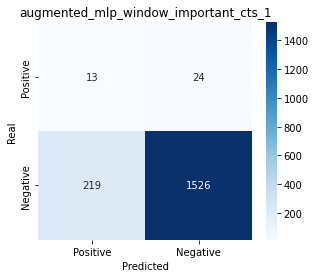

accuracy  : 86.36
precision : [98.45  5.6 ]
recall    : [87.45 35.14]
f1_score  : [92.63  9.67]

2th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.010326660324825864 1.2334096109839816
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_2of20.h5


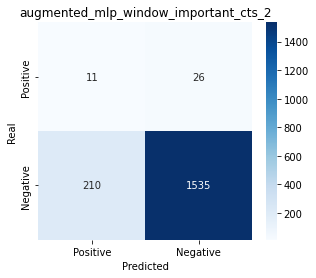

accuracy  : 86.76
precision : [98.33  4.98]
recall    : [87.97 29.73]
f1_score  : [92.86  8.53]

3th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.010150622134905045 1.0856390532390083
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_3of20.h5


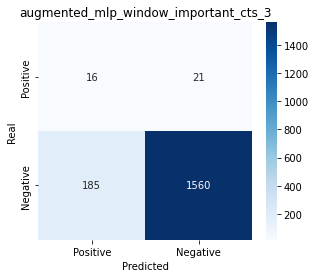

accuracy  : 88.44
precision : [98.67  7.96]
recall    : [89.4  43.24]
f1_score  : [93.81 13.45]

4th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.032036613272311214 1.2334096109839816
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_4of20.h5


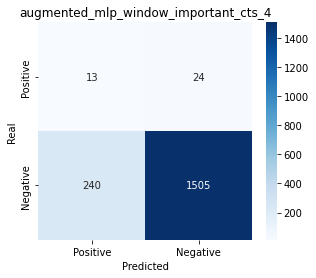

accuracy  : 85.19
precision : [98.43  5.14]
recall    : [86.25 35.14]
f1_score  : [91.94  8.97]

5th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.037974683544303806 1.0867900446713465
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_5of20.h5


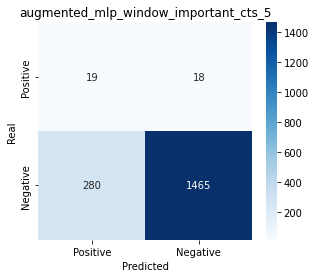

accuracy  : 83.28
precision : [98.79  6.35]
recall    : [83.95 51.35]
f1_score  : [90.77 11.31]

6th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.0114187838995147 1.215472902678131
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_6of20.h5


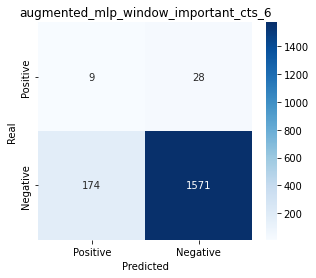

accuracy  : 88.66000000000001
precision : [98.25  4.92]
recall    : [90.03 24.32]
f1_score  : [93.96  8.18]

7th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.01959911029473751 1.1476834221381877
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_7of20.h5


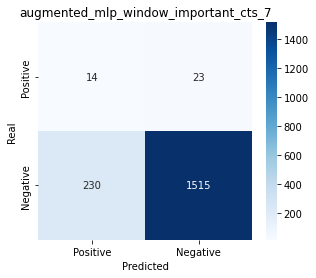

accuracy  : 85.8
precision : [98.5   5.74]
recall    : [86.82 37.84]
f1_score  : [92.29  9.96]

8th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.07051046204631907 1.3464368071002193
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_8of20.h5


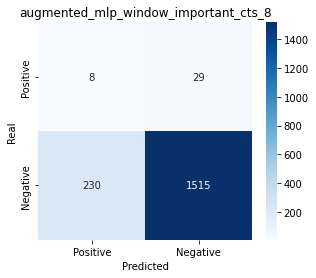

accuracy  : 85.47
precision : [98.12  3.36]
recall    : [86.82 21.62]
f1_score  : [92.13  5.82]

9th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.042349728369226396 1.0182495491238794
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_9of20.h5


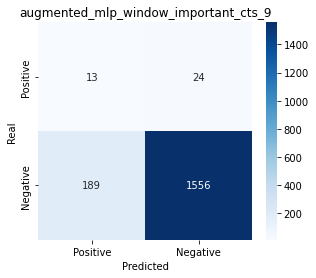

accuracy  : 88.05
precision : [98.48  6.44]
recall    : [89.17 35.14]
f1_score  : [93.59 10.88]

10th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.03961267605633803 1.086697832554186
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_10of20.h5


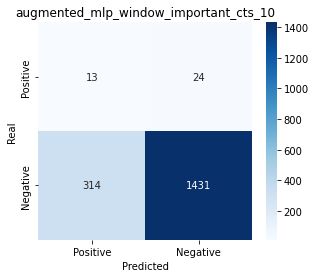

accuracy  : 81.03
precision : [98.35  3.98]
recall    : [82.01 35.14]
f1_score  : [89.44  7.14]

11th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: 0.0 1.086697832554186
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_11of20.h5


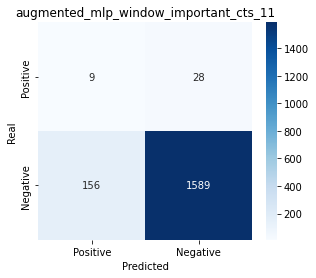

accuracy  : 89.67
precision : [98.27  5.45]
recall    : [91.06 24.32]
f1_score  : [94.53  8.91]

12th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.010326660324825864 1.1147952952726714
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_12of20.h5


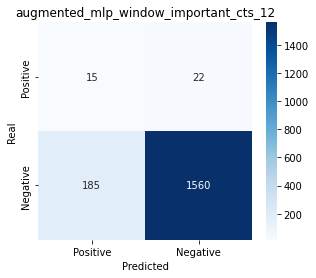

accuracy  : 88.38000000000001
precision : [98.61  7.5 ]
recall    : [89.4  40.54]
f1_score  : [93.78 12.66]

13th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.010188087774294733 1.2465688648193187
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_13of20.h5


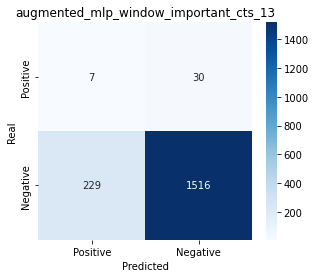

accuracy  : 85.47
precision : [98.06  2.97]
recall    : [86.88 18.92]
f1_score  : [92.13  5.13]

14th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.010188087774294733 1.2879330943847074
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_14of20.h5


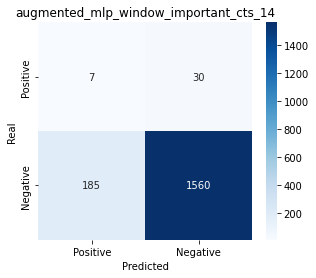

accuracy  : 87.92999999999999
precision : [98.11  3.65]
recall    : [89.4  18.92]
f1_score  : [93.55  6.11]

15th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.07172207301241755 1.215472902678131
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_15of20.h5


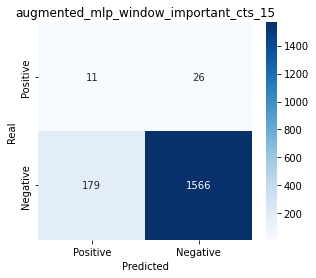

accuracy  : 88.5
precision : [98.37  5.79]
recall    : [89.74 29.73]
f1_score  : [93.86  9.69]

16th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: 0.0 1.0714933891754301
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_16of20.h5


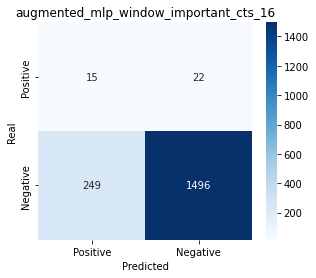

accuracy  : 84.78999999999999
precision : [98.55  5.68]
recall    : [85.73 40.54]
f1_score  : [91.69  9.97]

17th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.03758542141230069 1.215472902678131
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_17of20.h5


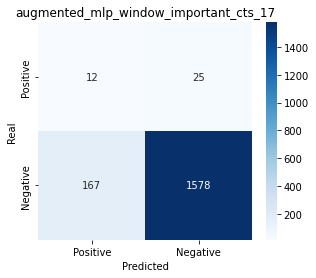

accuracy  : 89.23
precision : [98.44  6.7 ]
recall    : [90.43 32.43]
f1_score  : [94.27 11.11]

18th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.032036613272311214 1.2465688648193187
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_18of20.h5


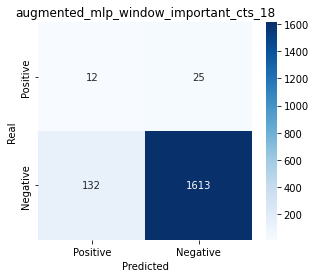

accuracy  : 91.19
precision : [98.47  8.33]
recall    : [92.44 32.43]
f1_score  : [95.36 13.26]

19th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: -0.03758542141230069 1.054024236878002
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_19of20.h5


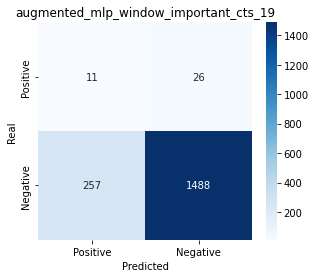

accuracy  : 84.11999999999999
precision : [98.28  4.1 ]
recall    : [85.27 29.73]
f1_score  : [91.32  7.21]

20th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 521) (7128, 1)
check scale: 0.0 1.0

test: (1782, 521) (1782, 1)
check scale: 0.0 1.2879330943847074
up-sampled train dataset: (13960, 521) (13960, 1)
model has been restored from ./h5/augmented_mlp_window_important_cts_5_100_cv_20of20.h5


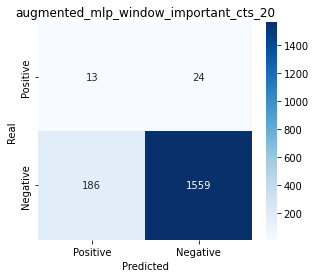

accuracy  : 88.22
precision : [98.48  6.53]
recall    : [89.34 35.14]
f1_score  : [93.69 11.02]


In [7]:
from src.graph_plot import *

for i in range(n_cv):
    print(f"\n{i+1}th iteration")
    random.seed(i+1)
    train_x, train_y, test_x, test_y, _, _ = stratified_split(data_x, data_y, 
                                                          test_size=test_size, random_state=i+1, 
                                                          scale_x=x_cts, scale_y=[])
    train_x, train_y = up_sampling(train_x, train_y)

    x_dim = train_x.shape[1]
    y_dim = train_y.shape[1]
    save_path  = f'./h5/{model_name}_{n_layers}_{n_neurons}_cv_{i+1}of{n_cv}.h5'

    model = MLP(x_dim, y_dim)
    model.build(n_layers, n_neurons)
    model.load_model(save_path)
    
    prediction = model.model.predict(test_x, verbose=0)
    y_pred = prediction.round(0).astype(int)
    y_real = test_y
    
    plot_confusion(y_real, y_pred, title=model_name+f"_{i+1}", label=["Positive","Negative"])